In [4]:
%matplotlib inline
import math
import pandas as pd
from tsmom_model import *
import numpy as np
from datetime import datetime
from scipy.stats import norm

token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data

In [5]:
cleansed=load_amihud_markets_price()

tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


# Fong, Holden and Trzcinka (2010)

$$ FHT = 2 \sigma N^{-1} \left ( \frac{1+Z}{2} \right ) $$

Where $Z$ is the proportion of Zero days. and $N^{-1}()$ is the inverse of the cumulative normal function.

In [6]:
x=cleansed['CME-3 MTH EURODOLLAR COMP.'].dropna().pct_change()

In [7]:
z=x[x==0].resample(rule='m',how='count')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


In [8]:
Z=(z/x.resample(rule='m',how='count')).dropna()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


* This should be inverse of the CDF, but I'm not sure it is

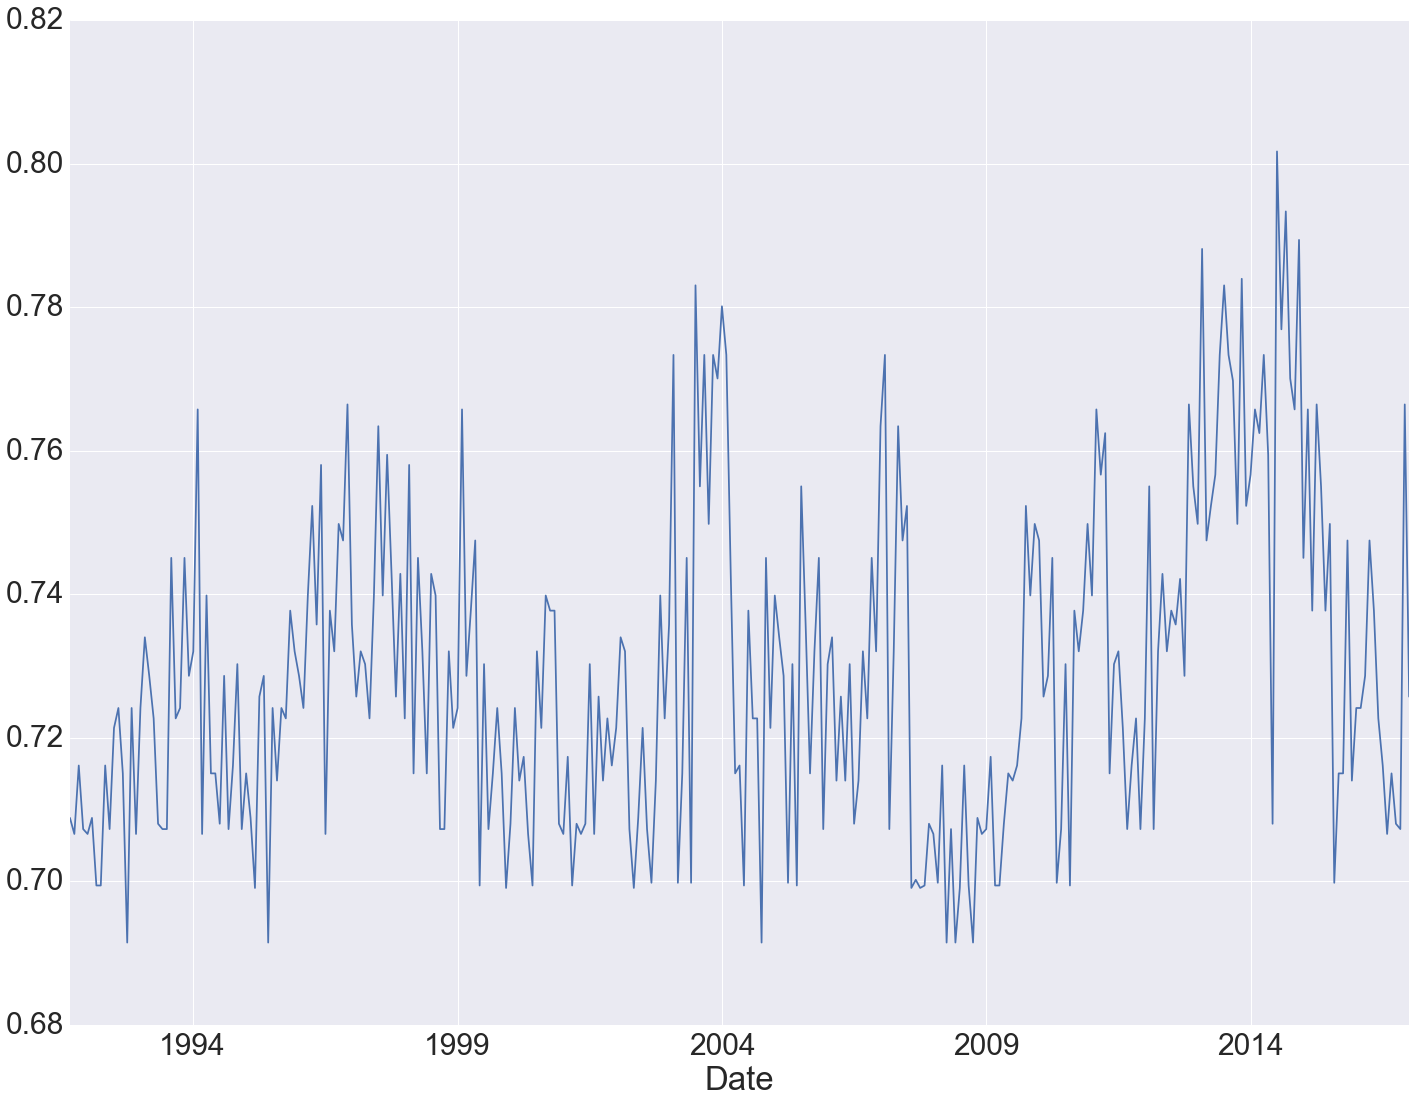

In [9]:
pd.Series(norm.cdf((1+Z)/2.),index=Z.index).plot()

In [10]:
tem=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,120).resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).std()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


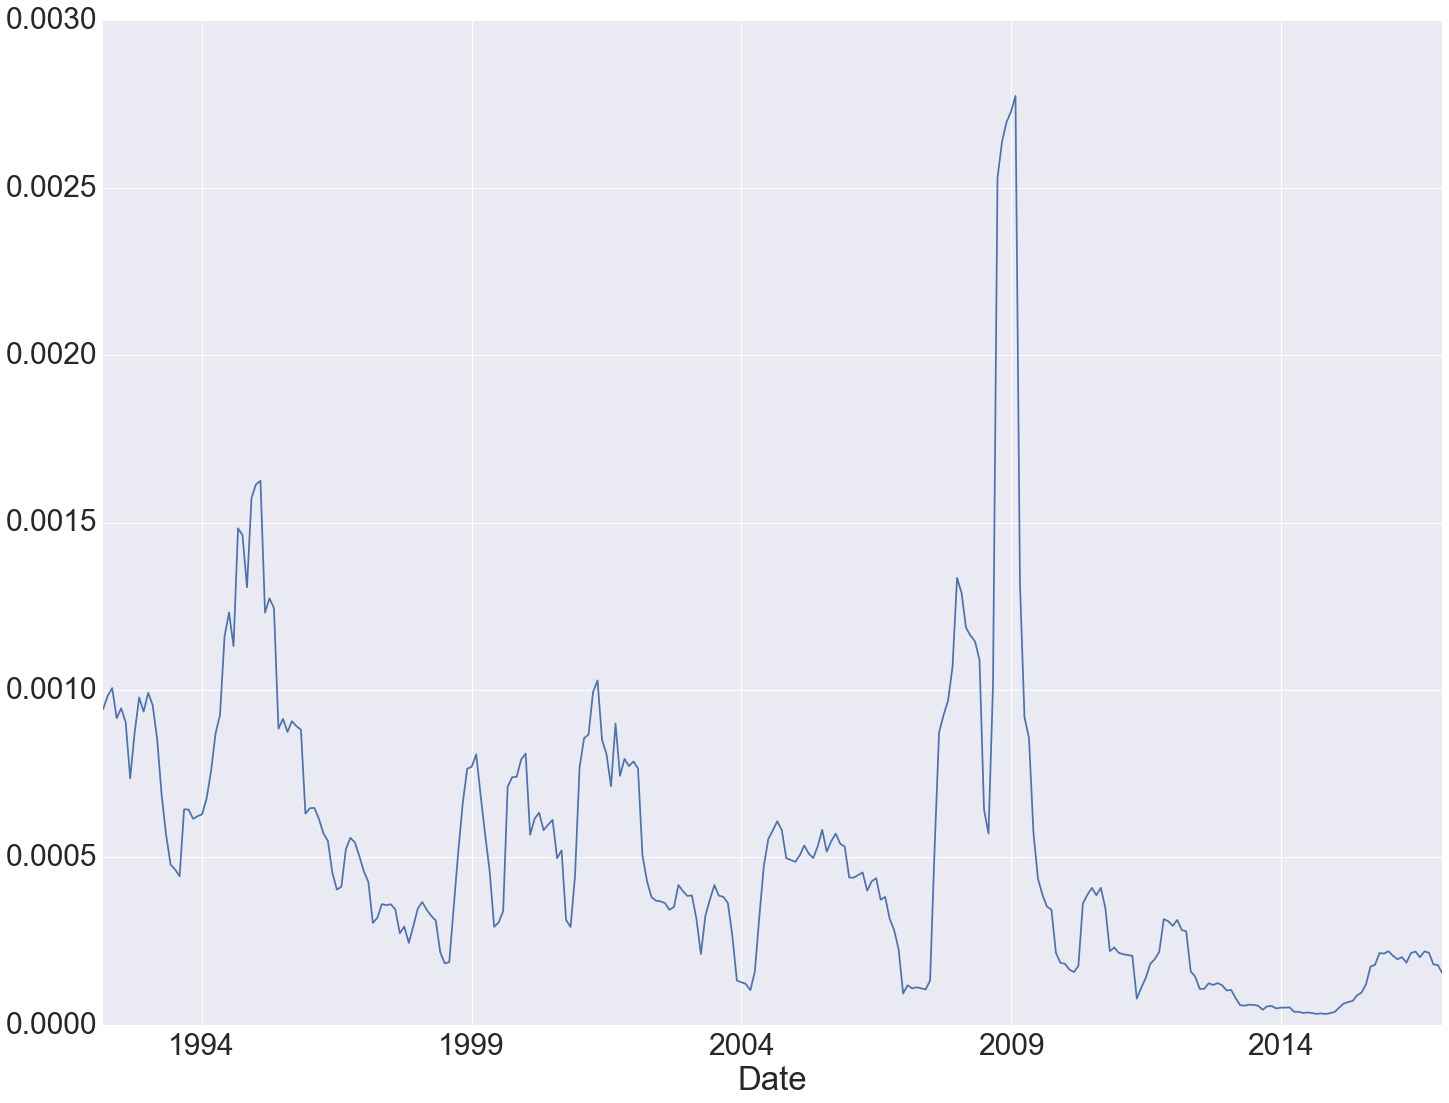

In [11]:
tem.dropna().plot()